<a href="https://colab.research.google.com/github/szertan/DATASCI112-Space-Thruster-Project/blob/main/STP_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2.0 Overall Trends


In this section, we will be exploring the relationships and behavioural analysis of various parameters with each other. Specifically, we will be looking for all kinds of erratic behaviour and what that could mean for the overall trends the dataset follows. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
m_train = pd.read_csv('/content/drive/MyDrive/STP/metadata_train.csv')

In [2]:
m_train

,uid,filename,test_id,sn,test_pressure,test_mode,vl1,vl2,vl3,anomalous,anomaly_code,cumulated_throughput,cumulated_on_time,cumulated_pulses,thrust_rms,mfr_avg
0,1,00001_001_SN01_24bars_ssf.csv,1,1,24.0,ssf,True,True,False,False,0.0,0.000000,0.000000,0.0,1.197942,1.476201e+03
1,2,00002_002_SN01_21bars_ssf.csv,2,1,21.0,ssf,True,True,False,False,0.0,0.451717,0.083333,1.0,1.036821,1.276309e+03
2,3,00003_003_SN01_18bars_ssf.csv,3,1,18.0,ssf,True,True,False,False,0.0,0.842268,0.166667,2.0,0.879668,1.086460e+03
3,4,00004_004_SN01_15bars_ssf.csv,4,1,15.0,ssf,True,True,False,False,0.0,1.174725,0.250000,3.0,0.734270,9.080451e+02
4,5,00005_005_SN01_12bars_ssf.csv,5,1,12.0,ssf,True,True,False,False,0.0,1.452586,0.333333,4.0,0.601292,7.420246e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1264,01264_108_SN12_5bars_onmod.csv,108,12,5.0,onmod,False,False,False,False,0.0,15.088221,6.743203,20860.0,0.003333,4.185253e-19
1263,1265,01265_109_SN12_5bars_offmod.csv,109,12,5.0,offmod,False,False,False,False,0.0,15.088221,6.765689,21660.0,0.003324,5.650626e-18
1264,1266,01266_110_SN12_5bars_random_short.csv,110,12,5.0,random_short,False,False,False,False,0.0,15.088221,6.976800,22460.0,0.003351,5.077638e-18
1265,1267,01267_111_SN12_5bars_random_long.csv,111,12,5.0,random_long,False,False,False,False,0.0,15.088221,7.016875,22760.0,0.003326,5.211657e-18


Text(0.5, 0, 'Mass Flow Rate (miligrams/second)')

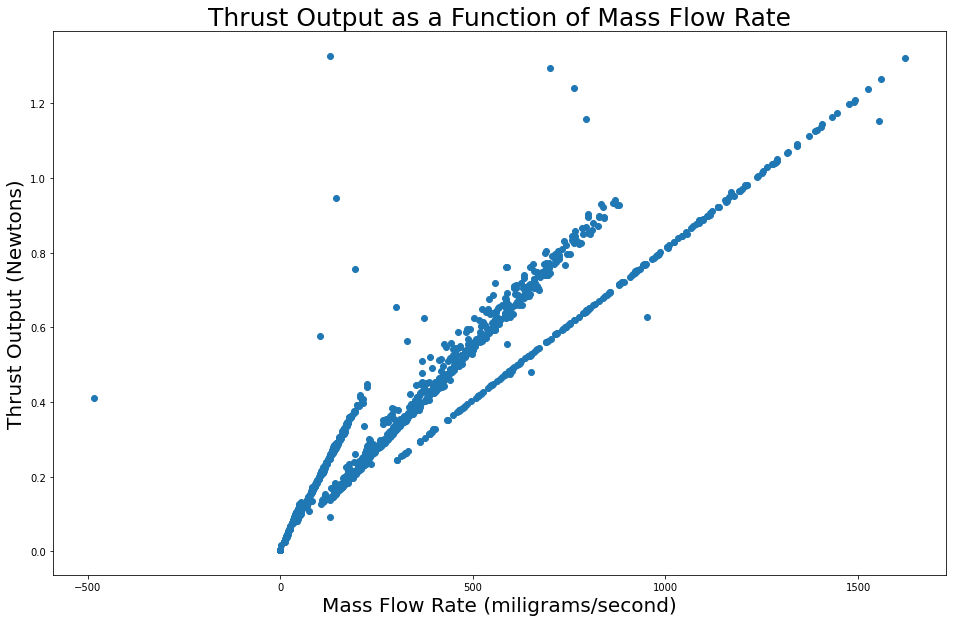

In [3]:
# we have 12 different setups, of whose configuration details we do not know of. 
# all 12 setups seem to follow one of the three scalability tracks. 
# based on the parameters given in this dataset, we wish to find: 
# which scalability curve does this setup follow? using its relationship to this curve, 
# can we understand what kind of scalability limitations we expect from this setup? 
plt.scatter(m_train["mfr_avg"], m_train["thrust_rms"])
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Thrust Output as a Function of Mass Flow Rate", size=25)
ax = plt.gca()
ax.set_ylabel("Thrust Output (Newtons)", size = 20)
ax.set_xlabel("Mass Flow Rate (miligrams/second)", size = 20)

We know, through the scientific literature published on this subject, that the mass flow rate and thrust output are correlated with each other. Once we map all thrust RMS values and MFR averages, we get the plot above. Clearly, there are three distinct trends for how fast the thrust output grows as MFR increases. Yet, it seems that there are considerable sections of the graph at which the growth trends overlap, and the same MFR input yields different kinds of thrust outputs. Does this have anything to do with the individual behaviour of different setups? 

To examine this further, we shall now map the SN values (serial number values) of each datapoint into the system. If we observe clusters of the same setup within only one of the three trends available, we would then be able to conclude that the three different growth rates merely have to do with the physical properties of individual setups. 

### 2.1 Distribution of Individual Setups

Text(0.5, 0, 'Mass Flow Rate (miligrams/second)')

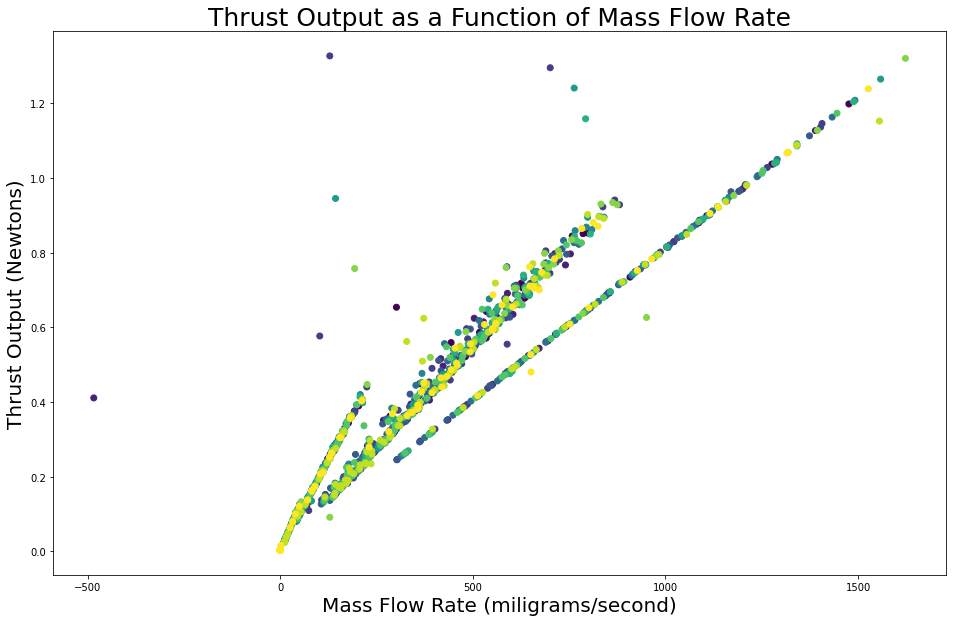

In [4]:
plt.scatter(m_train["mfr_avg"], m_train["thrust_rms"], c=m_train['sn'])
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Thrust Output as a Function of Mass Flow Rate", size=25)
ax = plt.gca()
ax.set_ylabel("Thrust Output (Newtons)", size = 20)
ax.set_xlabel("Mass Flow Rate (miligrams/second)", size = 20)
#plt.legend()

Looking at the graph above, we see that our initial guess does not hold true at all. 12 different setups with distinct serial numbers are all mapped on the three distinct growth regions of the graph. This means that the same setup, with the same MFR, could be delivering different thrust outputs. It also means that the same setup could follow different growth trends based on the parameters that the current physics is unable to take into account while making its predictions. 

This is a very important result: It tells us that for any given setup, knowing more about the physical contraints / conditions of any given setup proves to be valuable in understanding the behaviour of the thrust output and the scalability ranges of the setup. 

Now, let us explore the relationship between a few other parameters and the thrust output before we move on to our prediction models.

### 2.2 Fuel Consumption and Thrust Output: An Unexpected Surprise

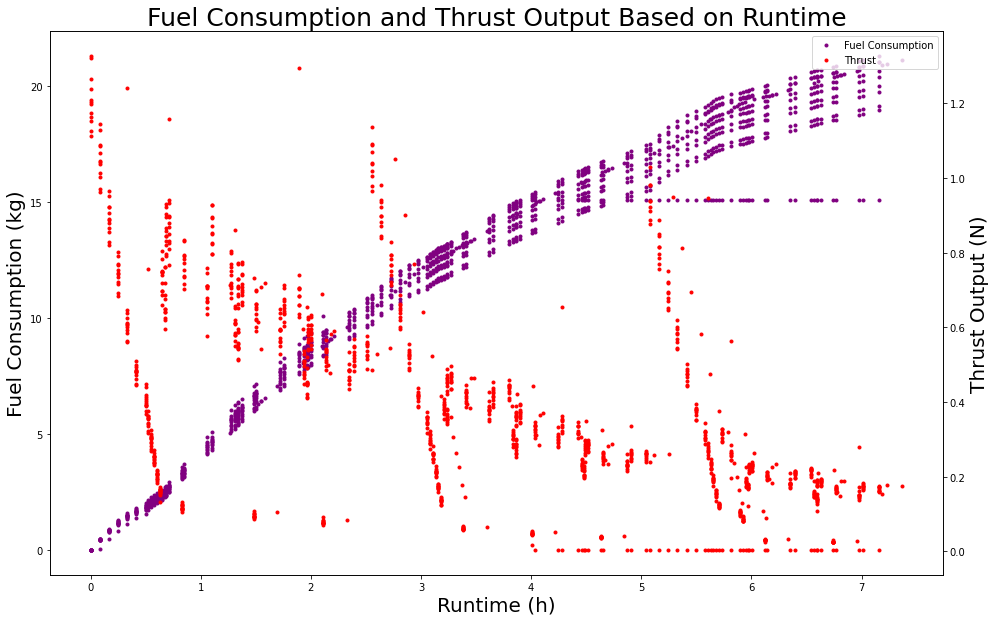

In [5]:
# significance of graph: this means that more fuel consumption implies higher mfr.
# therefore, we expect a very strong relationship between the mfr and thrust output, which we have found. 
# yet, in this relationship, there three possible trajectories. this means that there are other parameters
# that have a non-trivial effect on the scalability aspect of the thruster.
# hence, we want to be able to predict the impact these parameters have on the thrust output, and whether
# which scalability trajectory is the most likely for the given parameters. 
ax1 = plt.subplot()
l1, = ax1.plot(m_train["cumulated_on_time"], m_train["cumulated_throughput"], '.', color='purple', )
ax2 = ax1.twinx()
l2, = ax2.plot(m_train["cumulated_on_time"], m_train["thrust_rms"], '.', color='red')

fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Fuel Consumption and Thrust Output Based on Runtime", size=25)
ax1.set_ylabel("Fuel Consumption (kg)", size = 20)
ax1.set_xlabel("Runtime (h)", size = 20)
ax2.set_ylabel("Thrust Output (N)", size = 20)
plt.legend([l1, l2], ['Fuel Consumption', 'Thrust'])

In the graph above, we see an interesting but seemingly erratic trend regarding the behaviour of the setup: The total fuel consumed by a given engine increases over time as the total mission time increases. Yet, the thrust output follows an overall negative trend with three distinct spikes at which the thrust value decreases the most rapidly. 

This is curious of a case: We consume more fuel despite getting less thrust from the engine the longer we end up running it. What, then, happens to the fuel itself? What does it do? How does it get used up? How about the thrust output, why does it demonstrate such rapid falls that seem almost periodically recurring? 

We need further exploration. 


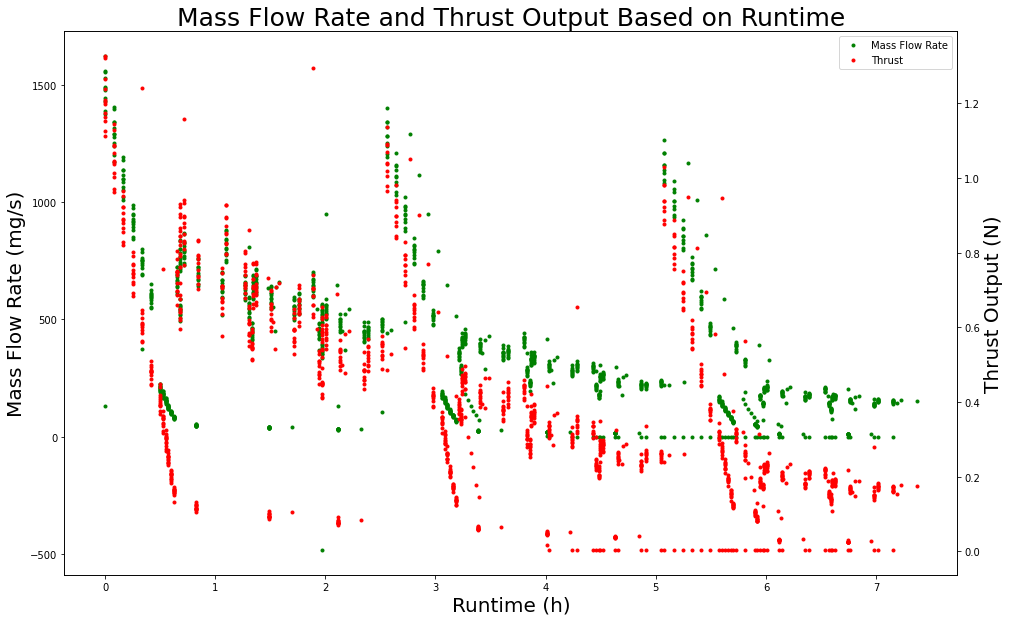

In [6]:
ax1 = plt.subplot()
l1, = ax1.plot(m_train["cumulated_on_time"], m_train["mfr_avg"], '.', color='green')
ax2 = ax1.twinx()
l2, = ax2.plot(m_train["cumulated_on_time"], m_train["thrust_rms"], '.', color='red')

fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Mass Flow Rate and Thrust Output Based on Runtime", size=25)
ax1.set_ylabel("Mass Flow Rate (mg/s)", size = 20)
ax1.set_xlabel("Runtime (h)", size = 20)
ax2.set_ylabel("Thrust Output (N)", size = 20)
plt.legend([l1, l2], ["Mass Flow Rate", "Thrust"])

The same behaviour that seemed erratic above in the previous graph now seems sensible. The MRS represents the amount of fuel inserted into the engine per unit of time, and they almost show the same exact behaviour once plotted together. This means that at one part of our mystery is somewhat resolved: The gas consumption increases over time despite the overall trajectory of the thrust output decreasing mainly because we now see that thrust primarily seems to follow a pulsed behaviour. It increases rapidly to its highest value (which seems to occur so fast that the graph does not present all of it), and decreases rapidly once again, though a bit slower this time. The highest returns of the thrust output align with the spikes of the MFR, which means that the engine likely has a breakdown pressure after which it produces a lot thrust and rapidly depletes fuel. 

In order to test our prediction, let us examine the following two graphs: 

### 2.4 Thrust Output and Pressure

Text(0.5, 0, 'Test Pressure')

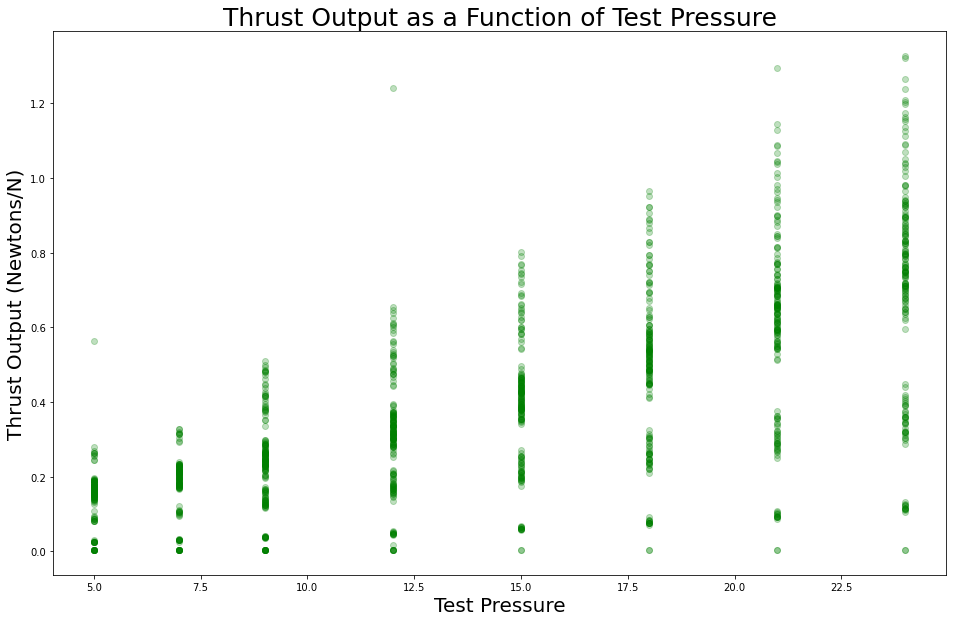

In [7]:
plt.scatter(m_train["test_pressure"], m_train["thrust_rms"],  color='green', alpha=0.25)
#plt.scatter(m_train["test_pressure"], m_train["mfr_avg"], color='red', alpha=0.25)
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Thrust Output as a Function of Test Pressure", size=25)
ax = plt.gca()
ax.set_ylabel("Thrust Output (Newtons/N)", size = 20)
ax.set_xlabel("Test Pressure", size = 20)

Text(0.5, 0, 'Test Pressure')

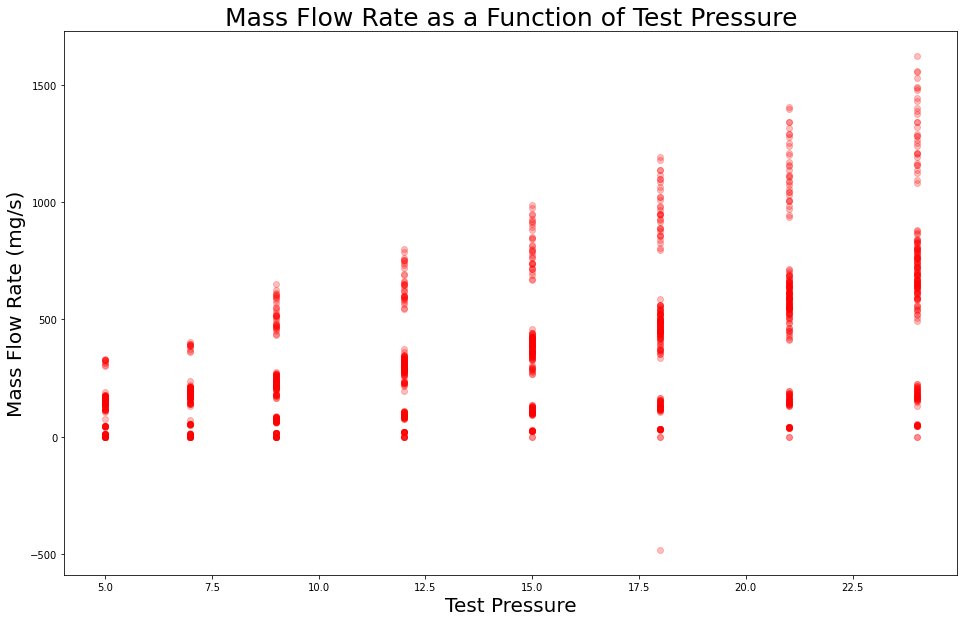

In [8]:
plt.scatter(m_train["test_pressure"], m_train["mfr_avg"], color='red', alpha=0.25)
fig = plt.gcf()
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.title("Mass Flow Rate as a Function of Test Pressure", size=25)
ax = plt.gca()
ax.set_ylabel("Mass Flow Rate (mg/s)", size = 20)
ax.set_xlabel("Test Pressure", size = 20)

We were right in our prediction! Thrust output and MFR follow the same exact trend once mapped over the test pressure, and we can confidently confirm that the erratic behaviour of the engine is not erratic at all; we merely need more ways of looking at it. 

### 2.5 Conclusion: What have learned from our setup?

We have learned a few non-trivial things about our setup: 

1. We have learned that the same setup with the same physical properties and MFR may belong to different growth trends despite MFR being the only "official" parameter we use once trying to predict the thrust outcome. Hence, MRS is not enough on its own for predicting the thrust output. 

2. Although we may uncover some of the mysterious behaviour of the engines using the correlations between various parameter pairs, we know that these relationships are not enough alone on making a prediction. Given the data seems to follow three distinct growth patterns, making accurate predictions that are capable of reflecting the nuances of the influence added from the remaining factors still remain necessary. 

3. Therefore, for the rest of the project, we will be focusing on developing a prediction algorithm that will allow us to predict the thrust with a very low error rate, allowing us to understand whether our given setup may be used to achieve such a thrust output even before making a single experiment, and if so, whether scaling the setup at hand would yield to expected growth rates within that trend. 